In [1]:
library(WGCNA)
library(DESeq2)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vector

In [2]:
setwd("/data/wgcna/zhanghui_np")

In [3]:
# Read the gene fpkm table
data0 = read.csv("zhanghui_expression.csv")

In [4]:
head(data0)

,X,HORVU0Hr1G023200,HORVU5Hr1G016450,HORVU1Hr1G020590,HORVU5Hr1G008340,HORVU3Hr1G083680,HORVU4Hr1G006330,HORVU4Hr1G067550,HORVU7Hr1G118740,HORVU3Hr1G116550,⋯,HORVU3Hr1G055090,HORVU3Hr1G084290,HORVU0Hr1G030160,HORVU2Hr1G039040,HORVU3Hr1G001540,HORVU7Hr1G020610,HORVU1Hr1G027300,HORVU7Hr1G051530,ENSRNA049486433,ENSRNA049488473
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FPKM.hggt_8D_1,0.47,1.48,6.46,3.78,9.65,11.56,0.57,1.73,106.41,⋯,0,0,0,0,0,0,0,0,0,0
2,FPKM.hggt_8D_2,0.35,1.21,6.72,3.20,8.36,9.21,0.43,1.53,116.22,⋯,0,0,0,0,0,0,0,0,0,0
3,FPKM.hggt_8D_3,0.50,1.11,7.06,4.65,11.60,10.11,0.64,1.66,152.05,⋯,0,0,0,0,0,0,0,0,0,0
4,FPKM.WT_8D_1,0.18,0.65,3.98,2.33,4.77,5.53,0.23,0.61,42.44,⋯,0,0,0,0,0,0,0,0,0,0
5,FPKM.WT_8D_2,0.27,0.71,2.84,2.08,4.09,6.81,0.36,0.85,71.39,⋯,0,0,0,0,0,0,0,0,0,0
6,FPKM.WT_8D_3,0.21,0.54,3.28,1.39,5.91,3.05,0.22,0.99,72.63,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
datExpr0 = as.data.frame(data0[, -c(1)]) ##
rownames(datExpr0) = data0$X
head(datExpr0)

,HORVU0Hr1G023200,HORVU5Hr1G016450,HORVU1Hr1G020590,HORVU5Hr1G008340,HORVU3Hr1G083680,HORVU4Hr1G006330,HORVU4Hr1G067550,HORVU7Hr1G118740,HORVU3Hr1G116550,HORVU0Hr1G021280,⋯,HORVU3Hr1G055090,HORVU3Hr1G084290,HORVU0Hr1G030160,HORVU2Hr1G039040,HORVU3Hr1G001540,HORVU7Hr1G020610,HORVU1Hr1G027300,HORVU7Hr1G051530,ENSRNA049486433,ENSRNA049488473
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,0.47,1.48,6.46,3.78,9.65,11.56,0.57,1.73,106.41,1.17,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_2,0.35,1.21,6.72,3.20,8.36,9.21,0.43,1.53,116.22,1.07,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_3,0.50,1.11,7.06,4.65,11.60,10.11,0.64,1.66,152.05,1.59,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_1,0.18,0.65,3.98,2.33,4.77,5.53,0.23,0.61,42.44,0.64,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_2,0.27,0.71,2.84,2.08,4.09,6.81,0.36,0.85,71.39,0.83,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_3,0.21,0.54,3.28,1.39,5.91,3.05,0.22,0.99,72.63,0.43,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
gsg = goodSamplesGenes(datExpr0, verbose = 3)
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 186 genes from the calculation due to too many missing samples or zero variance.
  ..step 2
Removing genes: HORVU6Hr1G050370, HORVU6Hr1G008930, ENSRNA049489330, HORVU3Hr1G075030, HORVU3Hr1G002530, HORVU7Hr1G000040, HORVU5Hr1G048150, HORVU6Hr1G084290, HORVU3Hr1G112250, HORVU5Hr1G015490, ENSRNA049485928, HORVU3Hr1G091140, ENSRNA049488128, ENSRNA049489574, ENSRNA049489344, HORVU0Hr1G027310, ENSRNA049480216, HORVU4Hr1G073950, HORVU4Hr1G056350, HORVU2Hr1G057850, HORVU1Hr1G025150, HORVU7Hr1G036180, HORVU3Hr1G007540, HORVU2Hr1G107180, HORVU3Hr1G100470, HORVU1Hr1G086400, HORVU7Hr1G114220, HORVU3Hr1G002330, HORVU2Hr1G035730, HORVU2Hr1G000170, HORVU2Hr1G126810, HORVU2Hr1G006910, HORVU5Hr1G080120, ENSRNA049485217, HORVU0Hr1G028230, ENSRNA049476456, HORVU5Hr1G005490, ENSRNA049472835, HORVU5Hr1G012370, HORVU7Hr1G119340, HORVU5Hr1G076260, HORVU3Hr1G007720, HORVU7Hr1G047780, HORVU0Hr1G032130, HORVU7Hr1G115730, HORVU7

In [14]:
datExpr = log2(datExpr0+1)

In [15]:
head(datExpr)

,HORVU0Hr1G023200,HORVU5Hr1G016450,HORVU1Hr1G020590,HORVU5Hr1G008340,HORVU3Hr1G083680,HORVU4Hr1G006330,HORVU4Hr1G067550,HORVU7Hr1G118740,HORVU3Hr1G116550,HORVU0Hr1G021280,⋯,HORVU5Hr1G018260,HORVU5Hr1G095020,HORVU3Hr1G084290,HORVU2Hr1G039040,HORVU3Hr1G001540,HORVU7Hr1G020610,HORVU1Hr1G027300,HORVU7Hr1G051530,ENSRNA049486433,ENSRNA049488473
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,0.5558162,1.3103401,2.899176,2.257011,3.412782,3.650765,0.6507646,1.4489010,6.746985,1.1176950,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_2,0.4329594,1.1440464,2.948601,2.070389,3.226509,3.351911,0.5160151,1.3391374,6.873075,1.0496308,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_3,0.5849625,1.0772430,3.010780,2.498251,3.655352,3.473787,0.7136958,1.4114262,7.257859,1.3729521,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_1,0.2387869,0.7224660,2.316146,1.735522,2.528571,2.707083,0.2986583,0.6870607,5.440952,0.7136958,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_2,0.3448285,0.7739963,1.941106,1.622930,2.347666,2.965323,0.4436067,0.8875253,6.177719,0.8718436,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_3,0.2750070,0.6229304,2.097611,1.257011,2.788686,2.017922,0.2868811,0.9927684,6.202222,0.5160151,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
# Calculate sample distance and cluster the samples
sampleTree = hclust(dist(datExpr), method = "average");
# plot sample tree
pdf(file = "1-n-sampleClustering.pdf", width = 12, height = 9);
par(cex = 1.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="",
     cex.lab = 1.5,cex.axis = 1.5, cex.main = 2)
dev.off()

png 
  2

In [17]:
#===============================================================================
#
#  Choose soft threshold parameter
#
#===============================================================================

# Choose a set of soft threshold parameters
powers = c(c(1:20), seq(from = 22, to=30, by=2))
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5) 
# Scale-free topology fit index as a function of the soft-thresholding power
pdf(file = "2-n-sft.pdf", width = 9, height = 5);
par(mfrow = c(1,2));
cex1 = 0.9;
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
	xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
	main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red") 
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
	xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
	main = paste("Mean connectivity")) 
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
dev.off()

pickSoftThreshold: will use block size 1489.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1489 of 30042
   ..working on genes 1490 through 2978 of 30042
   ..working on genes 2979 through 4467 of 30042
   ..working on genes 4468 through 5956 of 30042
   ..working on genes 5957 through 7445 of 30042
   ..working on genes 7446 through 8934 of 30042
   ..working on genes 8935 through 10423 of 30042
   ..working on genes 10424 through 11912 of 30042
   ..working on genes 11913 through 13401 of 30042
   ..working on genes 13402 through 14890 of 30042
   ..working on genes 14891 through 16379 of 30042
   ..working on genes 16380 through 17868 of 30042
   ..working on genes 17869 through 19357 of 30042
   ..working on genes 19358 through 20846 of 30042
   ..working on genes 20847 through 22335 of 30042
   ..working on genes 22336 through 23824 of 30042
   ..working on genes 23825 through 25313 of 30042
   ..working on genes 25314 through 268

png 
  2

In [18]:
#===============================================================================
#
#  Turn data expression into topological overlap matrix
#
#===============================================================================

# Turn data expression into topological overlap matrix
power=sft$powerEstimate
TOM = TOMsimilarityFromExpr(datExpr, power = power)
dissTOM = 1-TOM 
# Plot gene tree
geneTree = hclust(as.dist(dissTOM), method = "average"); ## hclust(dist(datExpr0), method = "average")
pdf(file = "3-gene_cluster.pdf", width = 12, height = 9);
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
     labels = FALSE, hang = 0.04);
dev.off()

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


png 
  2

In [19]:
#===============================================================================
#
#  Construct modules
#
#===============================================================================

# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,deepSplit = 2, 
                            pamRespectsDendro = FALSE,minClusterSize = 30);
table(dynamicMods)
length(table(dynamicMods)) 
# Convert numeric labels into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
pdf(file = "4-module_tree.pdf", width = 8, height = 6);
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",dendroLabels = FALSE,
                    hang = 0.03,addGuide = TRUE, guideHang = 0.05,main = "Gene dendrogram and module colors")
dev.off()

 ..cutHeight not given, setting it to 0.991  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 331 6449 5638 2016 1352  786  668  664  652  615  602  590  581  566  565  536 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 480  475  474  388  366  365  358  336  313  276  254  249  247  243  218  185 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 179  174  155  136  117  105   92   91   86   85   84   75   75   75   64   62 
  48   49   50   51   52   53   54   55   56   57   58 
  60   59   58   54   51   51   47   46   44   40   39 

[1] 59

dynamicColors
        bisque4           black            blue           brown          brown4 
             62             664            5638            2016              64 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
            565             358             313             155             174 
     darkorange     darkorange2         darkred   darkslateblue   darkturquoise 
            254              75             365              60             336 
    floralwhite           green     greenyellow            grey          grey60 
             75             786             590             331             475 
      honeydew1           ivory  lavenderblush3       lightcyan      lightcyan1 
             39              75              40             480              84 
     lightgreen      lightpink4 lightsteelblue1     lightyellow         magenta 
            474              44              85             388             615 
         maroo

png 
  2

In [20]:
#===============================================================================
#
#  Merge modules
#
#===============================================================================

# Merge close modules
MEDissThres=0.25 ## change this value based on own data
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3) 
mergedColors = merge$colors  
mergedMEs = merge$newMEs  
# Plot merged module tree
pdf(file = "5-merged_Module_Tree.pdf", width = 12, height = 9)  
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors), 
                    c("Dynamic Tree Cut", "Merged dynamic"), dendroLabels = FALSE, 
                    hang = 0.03, addGuide = TRUE, guideHang = 0.05)  
abline(h=MEDissThres, col = "red")
dev.off()
write.table(merge$oldMEs,file="oldMEs.txt");
write.table(merge$newMEs,file="newMEs.txt");

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 59 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 44 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 42 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 42 module eigengenes in given set.


png 
  2

In [21]:
#===============================================================================
#
#  Export of networks to external software
#
#===============================================================================

# Export the gene list of old modules 
for (i in 1:length(merge$newMEs)){
    modules = c(substring(names(merge$oldMEs)[i], 3));
    genes = colnames(datExpr)
    inModule = is.finite(match(dynamicColors,modules))
    modGenes = genes[inModule]
    modTOM=TOM[inModule,inModule]
    dimnames(modTOM)=list(modGenes,modGenes)
    cyt = exportNetworkToCytoscape(modTOM,
            edgeFile = paste("orign_CytoscapeInput-edges-", paste(modules, collapse="-"), ".txt", sep=""),
            nodeFile = paste("orign_CytoscapeInput-nodes-", paste(modules, collapse="-"), ".txt", sep=""),
            weighted = TRUE, threshold = -1, nodeNames = modGenes, nodeAttr = dynamicColors[inModule]);
}

In [22]:
head(datExpr)

,HORVU0Hr1G023200,HORVU5Hr1G016450,HORVU1Hr1G020590,HORVU5Hr1G008340,HORVU3Hr1G083680,HORVU4Hr1G006330,HORVU4Hr1G067550,HORVU7Hr1G118740,HORVU3Hr1G116550,HORVU0Hr1G021280,⋯,HORVU5Hr1G018260,HORVU5Hr1G095020,HORVU3Hr1G084290,HORVU2Hr1G039040,HORVU3Hr1G001540,HORVU7Hr1G020610,HORVU1Hr1G027300,HORVU7Hr1G051530,ENSRNA049486433,ENSRNA049488473
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,0.5558162,1.3103401,2.899176,2.257011,3.412782,3.650765,0.6507646,1.4489010,6.746985,1.1176950,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_2,0.4329594,1.1440464,2.948601,2.070389,3.226509,3.351911,0.5160151,1.3391374,6.873075,1.0496308,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_3,0.5849625,1.0772430,3.010780,2.498251,3.655352,3.473787,0.7136958,1.4114262,7.257859,1.3729521,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_1,0.2387869,0.7224660,2.316146,1.735522,2.528571,2.707083,0.2986583,0.6870607,5.440952,0.7136958,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_2,0.3448285,0.7739963,1.941106,1.622930,2.347666,2.965323,0.4436067,0.8875253,6.177719,0.8718436,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_3,0.2750070,0.6229304,2.097611,1.257011,2.788686,2.017922,0.2868811,0.9927684,6.202222,0.5160151,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
head(merge$newMEs)

,MEhoneydew1,MEdarkorange2,MEtan,MEroyalblue,MElightpink4,MElightyellow,MEthistle2,MEnavajowhite2,MElightsteelblue1,MEivory,⋯,MEyellowgreen,MEbisque4,MEdarkslateblue,MEmagenta,MEsalmon4,MEdarkturquoise,MEplum1,MEblue,MElightcyan1,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,-0.13043387,-0.03324184,-0.09457135,-0.05639717,-0.16039214,-0.08280807,-0.15670748,-0.008683186,0.1200325,0.62134783,⋯,-0.1137639,-0.08437797,-0.13311157,-0.04982373,-0.17551731,0.006839084,-0.07234195,0.2990255,-0.080383686,-0.26010815
FPKM.hggt_8D_2,-0.15390135,-0.07086854,-0.10768525,-0.06860973,-0.11909949,-0.05626134,-0.10638435,0.630752277,-0.1163546,-0.02759251,⋯,-0.1034695,0.65811592,-0.16252353,-0.08404669,-0.12637860,-0.076633139,-0.08892048,0.2477534,-0.113788832,-0.11035786
FPKM.hggt_8D_3,-0.09342267,-0.08550701,-0.10715703,-0.07474500,-0.12716570,-0.04538101,-0.11947042,-0.026777788,0.6032733,-0.07622196,⋯,-0.1115181,-0.05882097,-0.14387934,-0.07795891,-0.11318147,-0.073803015,-0.13635188,0.3205319,0.649290168,-0.06962312
FPKM.WT_8D_1,-0.21213068,-0.15199478,-0.07062000,-0.11365678,0.62715575,-0.10609505,-0.12533829,-0.112290986,-0.1783155,-0.15178742,⋯,-0.1231384,0.62325925,0.66467225,0.95504976,0.65568808,0.507011067,0.66989345,0.2715123,0.625668968,-0.26375309
FPKM.WT_8D_2,-0.08782075,-0.11964944,-0.08212864,-0.10111613,-0.11660066,-0.08512520,-0.09045262,-0.137188032,-0.1133399,-0.13587866,⋯,0.6279972,-0.16622378,-0.02588607,-0.05526366,-0.08836531,0.487550104,-0.10945723,0.2664739,-0.152363854,0.13097596
FPKM.WT_8D_3,-0.14883905,-0.11353533,-0.07440656,-0.11156412,-0.08539834,-0.07304461,-0.06157311,-0.121801432,-0.1825252,-0.16387527,⋯,0.6605245,-0.10198375,-0.07950450,-0.06981093,-0.12135612,0.394574340,0.61492104,0.2016040,-0.007662487,0.25019165


In [25]:
head(datExpr)

,HORVU0Hr1G023200,HORVU5Hr1G016450,HORVU1Hr1G020590,HORVU5Hr1G008340,HORVU3Hr1G083680,HORVU4Hr1G006330,HORVU4Hr1G067550,HORVU7Hr1G118740,HORVU3Hr1G116550,HORVU0Hr1G021280,⋯,HORVU5Hr1G018260,HORVU5Hr1G095020,HORVU3Hr1G084290,HORVU2Hr1G039040,HORVU3Hr1G001540,HORVU7Hr1G020610,HORVU1Hr1G027300,HORVU7Hr1G051530,ENSRNA049486433,ENSRNA049488473
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,0.5558162,1.3103401,2.899176,2.257011,3.412782,3.650765,0.6507646,1.4489010,6.746985,1.1176950,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_2,0.4329594,1.1440464,2.948601,2.070389,3.226509,3.351911,0.5160151,1.3391374,6.873075,1.0496308,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.hggt_8D_3,0.5849625,1.0772430,3.010780,2.498251,3.655352,3.473787,0.7136958,1.4114262,7.257859,1.3729521,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_1,0.2387869,0.7224660,2.316146,1.735522,2.528571,2.707083,0.2986583,0.6870607,5.440952,0.7136958,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_2,0.3448285,0.7739963,1.941106,1.622930,2.347666,2.965323,0.4436067,0.8875253,6.177719,0.8718436,⋯,0,0,0,0,0,0,0,0,0,0
FPKM.WT_8D_3,0.2750070,0.6229304,2.097611,1.257011,2.788686,2.017922,0.2868811,0.9927684,6.202222,0.5160151,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
row.names(merge$newMEs)

[1] "FPKM.hggt_8D_1"  "FPKM.hggt_8D_2"  "FPKM.hggt_8D_3"  "FPKM.WT_8D_1"   
 [5] "FPKM.WT_8D_2"    "FPKM.WT_8D_3"    "FPKM.hggt_16D_1" "FPKM.hggt_16D_2"
 [9] "FPKM.hggt_16D_3" "FPKM.WT_16D_1"   "FPKM.WT_16D_2"   "FPKM.WT_16D_3"

In [27]:
rownames(datExpr)

[1] "FPKM.hggt_8D_1"  "FPKM.hggt_8D_2"  "FPKM.hggt_8D_3"  "FPKM.WT_8D_1"   
 [5] "FPKM.WT_8D_2"    "FPKM.WT_8D_3"    "FPKM.hggt_16D_1" "FPKM.hggt_16D_2"
 [9] "FPKM.hggt_16D_3" "FPKM.WT_16D_1"   "FPKM.WT_16D_2"   "FPKM.WT_16D_3"

In [29]:
dim(merge$newMEs)

[1] 12 42

In [30]:
merge$newMEs

,MEhoneydew1,MEdarkorange2,MEtan,MEroyalblue,MElightpink4,MElightyellow,MEthistle2,MEnavajowhite2,MElightsteelblue1,MEivory,⋯,MEyellowgreen,MEbisque4,MEdarkslateblue,MEmagenta,MEsalmon4,MEdarkturquoise,MEplum1,MEblue,MElightcyan1,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FPKM.hggt_8D_1,-0.13043387,-0.03324184,-0.09457135,-0.05639717,-0.16039214,-0.08280807,-0.15670748,-0.008683186,0.1200325,0.62134783,⋯,-0.1137639,-0.08437797,-0.13311157,-0.04982373,-0.17551731,0.006839084,-0.07234195,0.2990255,-0.080383686,-0.26010815
FPKM.hggt_8D_2,-0.15390135,-0.07086854,-0.10768525,-0.06860973,-0.11909949,-0.05626134,-0.10638435,0.630752277,-0.1163546,-0.02759251,⋯,-0.1034695,0.65811592,-0.16252353,-0.08404669,-0.12637860,-0.076633139,-0.08892048,0.2477534,-0.113788832,-0.11035786
FPKM.hggt_8D_3,-0.09342267,-0.08550701,-0.10715703,-0.07474500,-0.12716570,-0.04538101,-0.11947042,-0.026777788,0.6032733,-0.07622196,⋯,-0.1115181,-0.05882097,-0.14387934,-0.07795891,-0.11318147,-0.073803015,-0.13635188,0.3205319,0.649290168,-0.06962312
FPKM.WT_8D_1,-0.21213068,-0.15199478,-0.07062000,-0.11365678,0.62715575,-0.10609505,-0.12533829,-0.112290986,-0.1783155,-0.15178742,⋯,-0.1231384,0.62325925,0.66467225,0.95504976,0.65568808,0.507011067,0.66989345,0.2715123,0.625668968,-0.26375309
FPKM.WT_8D_2,-0.08782075,-0.11964944,-0.08212864,-0.10111613,-0.11660066,-0.08512520,-0.09045262,-0.137188032,-0.1133399,-0.13587866,⋯,0.6279972,-0.16622378,-0.02588607,-0.05526366,-0.08836531,0.487550104,-0.10945723,0.2664739,-0.152363854,0.13097596
FPKM.WT_8D_3,-0.14883905,-0.11353533,-0.07440656,-0.11156412,-0.08539834,-0.07304461,-0.06157311,-0.121801432,-0.1825252,-0.16387527,⋯,0.6605245,-0.10198375,-0.07950450,-0.06981093,-0.12135612,0.394574340,0.61492104,0.2016040,-0.007662487,0.25019165
FPKM.hggt_16D_1,-0.11022821,-0.18960317,-0.04245722,-0.05666480,-0.12106220,-0.09361110,-0.15847852,-0.207305980,-0.1100713,-0.12569790,⋯,-0.1411085,-0.11778298,-0.11338725,-0.08950988,0.63041570,-0.285040441,-0.13864041,-0.1119989,-0.128486193,-0.08204381
FPKM.hggt_16D_2,-0.14298120,-0.15380269,-0.06909912,-0.03818958,-0.13549168,-0.11673156,-0.16068068,-0.111482093,-0.1183630,-0.08015901,⋯,-0.1718191,-0.13394484,0.61170211,-0.11262536,-0.10019314,-0.347294909,-0.15262610,-0.1450280,-0.163137431,0.12588365
FPKM.hggt_16D_3,0.61864301,-0.17215173,-0.11893551,-0.10098372,-0.15352315,-0.08990630,-0.16229967,0.633403553,0.6359855,0.65299867,⋯,-0.1378444,-0.14727770,-0.13169100,-0.08768190,-0.13887465,-0.326963771,-0.16835930,-0.1117782,-0.142388517,0.31264911


In [31]:
#===============================================================================
#
#  Plot the heatmap of module eigen-genes and samples
#
#===============================================================================

library("pheatmap")

pdf 
  3

In [35]:

# Heatmap of old module eigen-genes and samples
pdf(file="oldMEs.pdf",heigh=15,width=20)

pheatmap(merge$oldMEs,cluster_col=T,cluster_row=T,show_rownames=T,show_colnames=T,fontsize=6)
dev.off()
# Heatmap of new module eigen-genes and samples
pdf(file="newMEs.pdf",heigh=15,width=20)

pheatmap(merge$newMEs,cluster_col=T,cluster_row=T,show_rownames=T,show_colnames=T,fontsize=10)
dev.off()

pdf 
  3

pdf 
  3

In [37]:
# Create an empty data frame with the same row names
allTraits <- data.frame(row.names = rownames(datExpr))
mutant_values <- c(1,1,1,0,0,0,1,1,1,0,0,0) ## 
day_values <- c(8,8,8,8,8,8,16,16,16,16,16,16)
# Add a new column from the list to the empty data frame
allTraits$mutation <- mutant_values
allTraits$day <- day_values
head(allTraits)

,mutation,day
,<dbl>,<dbl>
FPKM.hggt_8D_1,1,8
FPKM.hggt_8D_2,1,8
FPKM.hggt_8D_3,1,8
FPKM.WT_8D_1,0,8
FPKM.WT_8D_2,0,8
FPKM.WT_8D_3,0,8


In [41]:
nSamples

[1] 12

In [42]:
#=====================================================================================
#
#  Correlation between gene modules and microbial traits
#
#=====================================================================================

# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, mergedColors)$eigengenes
MEs = orderMEs(MEs0)
# Read microbial data as traits
bac_traits = allTraits

In [44]:
substr(rownames(MEs), 1, nchar(rownames(MEs))-1)

[1] "FPKM.hggt_8D_"  "FPKM.hggt_8D_"  "FPKM.hggt_8D_"  "FPKM.WT_8D_"   
 [5] "FPKM.WT_8D_"    "FPKM.WT_8D_"    "FPKM.hggt_16D_" "FPKM.hggt_16D_"
 [9] "FPKM.hggt_16D_" "FPKM.WT_16D_"   "FPKM.WT_16D_"   "FPKM.WT_16D_"

In [46]:
dim(MEs)

[1] 12 42

In [47]:
# sample names should be consistent in eigen genes and traits !!!!
bac_traits = bac_traits[match(rownames(MEs), rownames(bac_traits)), ]
table(rownames(MEs) == rownames(bac_traits))
# Calculate pearson correlation coefficients between module eigen-genes and traits
moduleTraitCor = cor(MEs, bac_traits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);
write.table(moduleTraitCor,file="moduleTrait_correlation.txt");
write.table(moduleTraitPvalue,file="moduleTrait_pValue.txt");


TRUE 
  12 

In [50]:
#=====================================================================================
#
#  Plot heatmap of module-traits relationship
#
#=====================================================================================

sizeGrWindow(3,10)
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                    signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
pdf("module-traits-order.pdf", width = 100, height = 30)
par(mar = c(15, 12, 5, 5));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(bac_traits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = greenWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 1,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))
dev.off()

Warning message in greenWhiteRed(50):
“WGCNA::greenWhiteRed: this palette is not suitable for people
with green-red color blindness (the most common kind of color blindness).
Consider using the function blueWhiteRed instead.”


png 
  2

In [51]:
#=====================================================================================
#
#  Plot heatmap of module-traits relationship
#
#=====================================================================================

sizeGrWindow(3,10)
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                    signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
pdf("module-traits-order.pdf", width = 100, height = 30)
par(mar = c(15, 12, 5, 5));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(bac_traits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = greenWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 1,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))
dev.off()

Warning message in greenWhiteRed(50):
“WGCNA::greenWhiteRed: this palette is not suitable for people
with green-red color blindness (the most common kind of color blindness).
Consider using the function blueWhiteRed instead.”


png 
  2

Warning message in greenWhiteRed(50):
“WGCNA::greenWhiteRed: this palette is not suitable for people
with green-red color blindness (the most common kind of color blindness).
Consider using the function blueWhiteRed instead.”


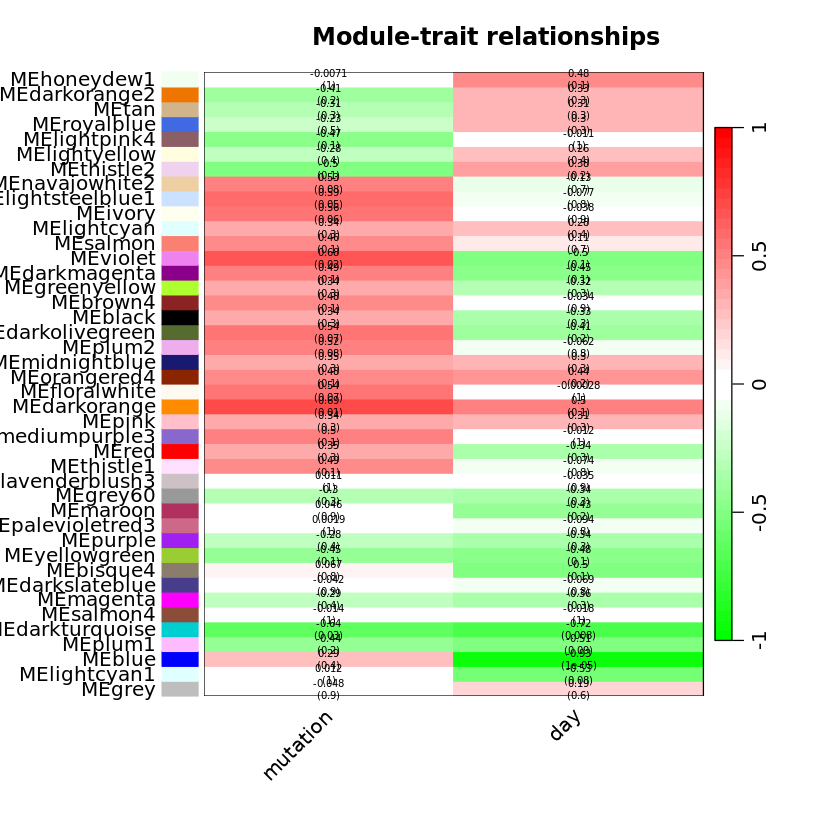

In [54]:
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(allTraits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = greenWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.5,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))

In [56]:
pdf("6-module-traits-order.pdf", width = 8, height = 12)  # Adjust width and height as needed
par(mar = c(6, 8.5, 3, 3))

# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(allTraits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = greenWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.5,
               zlim = c(-1, 1),
               main = paste("Module-trait relationships"))
dev.off()

Warning message in greenWhiteRed(50):
“WGCNA::greenWhiteRed: this palette is not suitable for people
with green-red color blindness (the most common kind of color blindness).
Consider using the function blueWhiteRed instead.”


png 
  2

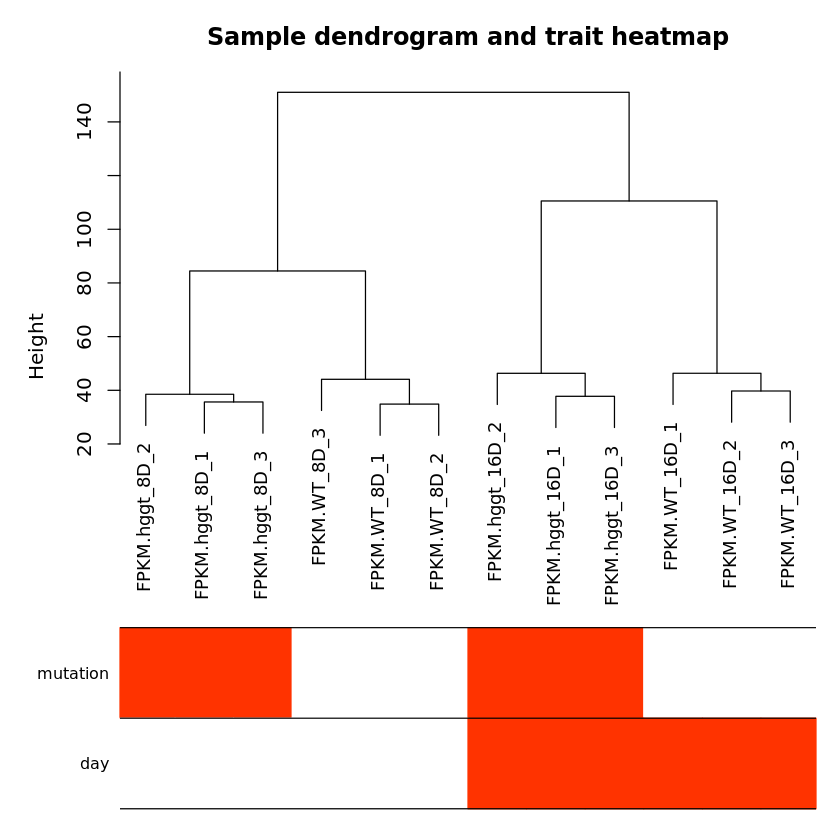

In [57]:
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = numbers2colors(allTraits, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(allTraits), 
                    main = "Sample dendrogram and trait heatmap")